<!-- dom:TITLE: Preliminaries  -->
# Preliminaries 
<!-- dom:AUTHOR: Anne Kværnø -->
<!-- Author: -->  
**Anne Kværnø**

Date: **Aug 18, 2022**

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

# Introduction
In your mathematical courses so far, you have learned how to solve different
mathematical problems, like linear and nonlinear equations and differential
equations. You have learned how to differentiate and to integrate functions.  
Unfortunately, only simplified models from "real life" applications can be
treated by these techniques,  more complex and realistic problems the best we
can aim for is some kind of approximate solution, found on a computer by some
clever numerical algorithms. In this part of the course, our concern is how to
develop, analyse, implement and test a selection of such algorithms. 

In this note, we will present some mathematical results that will be 
used frequently, as well as some definitions and concepts. Most of it should be known from
previous courses, in particular from Mathematics 1 and 3. 

Whenever some theoretical error analysis has been established, it should be
verified numerically. This is done based on a test problem with a known exact
solution, so the error in our numerical experiment can be evaluated, and the
theory numerically verified. Examples of such verifications will be demonstrated. 

# Vector spaces and norms
**Real vector space.**

A *real vector space* is a set $V$ together with the operations $+$ (addition) and $\cdot$ (scalar multiplication) which for all $x,y,z \in V$ and $\alpha, \beta \in \mathbb{R}$ satisfy the following conditions:

$$
\begin{array}{rl}
1) & x+y \in V \\ 
2) & x+y=y+x \\ 
3) & x+(y+z)=(x+y)+z  \\ 
4) & \text{There exist a $0\in V$ such that } x+0=x \\ 
5) & \text{For all $x\in V$ there is a $-x \in V$ such that $x+(-x)=0$} \\ 
6) & \alpha x \in V \\ 
7) & \alpha (\beta x) = (\alpha \beta) x \\ 
8) & 1 x = x \\ 
9) & \alpha (x+y) = \alpha x + \alpha y \\ 
10) & (\alpha + \beta)x = \alpha x + \beta x
\end{array}
$$

**Examples:** 
The following vector spaces will be used throughout the course:

* $\mathbb{R}^m$ is the set of all real vectors with $m$ components. 

* $\mathbb{R}^{m\times n}$ is the set of all $m\times n$ real matrices.

* $C^m[a,b]$ is the set of all functions with continuous first $m$ derivatives on the interval $[a,b]$. It is common to use $C[a,b]$ rather than $C^0[a,b]$ for all continuous functions.   

* $\mathbb{P}_n$ is the set of all polynomials of degreeat most  $n$. 

Notice that $C^n[a,b] \subset C^m[a,b]$ if $n > m$. 
Further, $\mathbb{P}_n \subset C^{\infty}[\mathbb{R}]$.

### Norms

The norm $\|\cdot\|$ of an element $x$  in a vector space $V$ is essentially a measure of the size of the element. 
The norm obeys the following rules:

**Norm $\|\cdot\|$.**

For all $x,y \in V$ and $\alpha \in \mathbb{R}$ the following holds

$$
\begin{align*}
\|x\| & \geq 0 && \text{and} \qquad 
 \|x\|=0 \quad  \Leftrightarrow \quad x \equiv 0 \\ 
\|\alpha x\| &= |\alpha |\, \|x\|, \\ 
\|x+y\| &\leq  \|x\|+\|y\| && (\text{Triangle inequality}). 
\end{align*}
$$

**Norms for $C[a,b]$ and $\mathbb{R}^m$:**
* For $f\in C[a,b]$ we will use: 

  * either $\|f\|_{\infty} = \max_{x\in [a,b]}|f(x)|$.

  * or $\|f\|_2 = \sqrt{\int_a^b f(x)^2dx}$. 


* For $\mathbf{x} \in \mathbb{R}^m$ we will use:  

  * either $\|\mathbf{x}\|_{\infty} = \max_{i=1}^m |x_i|$, 

  * or $\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^m x_i^2}$.


Note that we will use bold symbols for vectors $\mathbf{x} \in \mathbb{R}^m$. 

As is demonstrated in these examples, the norm to which we
refer is usually marked with a subscript. 
We will always use the absolute value as the norm of a real number, thus
$\|x\|=|x|$ whenever $x\in \mathbb{R}$.   

**Example 1:**
Let $\mathbf{x}=[1,-6,3,-1,5]^T\in \mathbb{R}^5$. Then

$$
\begin{align*}
  \|\mathbf{x}\|_2 &= \sqrt{1+36+9+1+25} = 8.4853, \\ 
  \|\mathbf{x}\|_{\infty} &= \max\{1,6,3,1,5\}= 6.
\end{align*}
$$

Norms of vectors in $\mathbb{R}^m$  are implemented in Python, in the module `numpy.linalg`.

In [2]:
''' The norm of a vector in R^n '''
from numpy.linalg import norm
x = np.array([1, -6, 3, -1, 5])
norm_of_x_2 = norm(x)                 # The 2-norm is the default
norm_of_x_inf = norm(x,ord=np.inf)    # The max-norm
print(f"x = {x}")
print(f"The 2-norm   of x: {norm_of_x_2:8.4f}")
print(f"The max-norm of x: {norm_of_x_inf:8.4f}")

x = [ 1 -6  3 -1  5]
The 2-norm   of x:   8.4853
The max-norm of x:   6.0000


**Example 2:**
Let $f(x)=\sin(x)$ on $[0,2\pi]$, so $f\in C^{\infty}[0,2\pi]$. In this case

$$
\begin{align*}
  \|f\|_2 &= \displaystyle \sqrt{\int_0^{2\pi} \sin^2(x) dx} = \sqrt{\pi} = 1.7725 \\ 
  \|f\|_{\infty} &= \displaystyle \max_{x\in[0,2\pi]}|\sin(x)| = 1.
\end{align*}
$$

Norms on function spaces require some sort of numerical approximations. In this case, the interval $[0,2\pi]$ has been divided into $N=1000$ uniform subintervals, so $x_i=(2\pi i)/N$, $i=0,1,\dots,N$. The norm $\|f\|_{\infty}$ is approximated by $\max_i|f(x_i)|$, and the integral required for $\|f\|_2$ is computed by the trapezoidal rule.

In [3]:
''' Approximations to the norm of a function in C[a,b] '''
def f(x):                                        # The function
    return np.sin(x)
a, b = 0, 2*np.pi                                # The interval

x = np.linspace(a, b, 1001)                      # The values of x on [a,b]
norm_of_f_2 = np.sqrt(np.trapz(f(x)**2, x=x))    # Approximate the integral by the trapezoidal rule
norm_of_f_inf = np.max(np.abs(f(x)))             # Approximate the max-norm by max|f(x_i)| 

print(f"The 2-norm   of f: {norm_of_f_2:8.4f}")
print(f"The max-norm of f: {norm_of_f_inf:8.4f}")

The 2-norm   of f:   1.7725
The max-norm of f:   1.0000


# Convergence and errors

**Convergence of a sequence.**

Let $\{x_k\}_{k=0}^{\infty}$ be an infinite sequence of real numbers. The sequence converges to $x$, if, for any $\varepsilon >0$ there exist a positive integer $N(\varepsilon)$ such that $|x_k - x| < \varepsilon$ whenever $k > N(\varepsilon)$. 

Common notations:

$$
\lim_{k\rightarrow\infty} x_k = x \qquad \text{or} \qquad x_k \rightarrow x \text{ as } k\rightarrow \infty.
$$

**Example 3:**
It is known that the sequence $x_k=(1+1/k)^k \rightarrow e = 2.7182\dotsc$ as $k\rightarrow
\infty$. The sequence is monotone, so $|x_{k+1}-e| < |x_k-e|$. The following
program demonstrates the concept of convergence for this  sequence: Given an $\varepsilon$, the
positive integer $N(\varepsilon)$ is returned.

In [4]:
''' Demonstrate the convergence of a sequence '''
epsilon = 1.e-3
x_exact = np.exp(1)            # Exact solution
Nmax = 10**7                   # Maximum N, to avoid infinite loops.
step = 1                       # increments of k. Make it large for epsilon small
for k in range(1, Nmax, step): 
    xk = (1+1/k)**k
    if abs(xk-x_exact) < epsilon:
        break
if k+1==Nmax:
    print("Maximum N reached")
print(f"epsilon = {epsilon:.2e}, N = {k:d}")
print(f"xk = {xk:f}, |xk-e| = {abs(xk-x_exact):e}")

epsilon = 1.00e-03, N = 1359
xk = 2.717282, |xk-e| = 9.994296e-04


Clearly, this code can only be used for monotone series.  

Warning: The sequence converges very slowly, so given a very small `epsilon`
will result in $N$ too large. This can be compensated by making `Nmax` larger,
and increment $k$ in larger steps.

## Convergence of an iterative process
Let $X$ be the exact solution of a problem, and $X_k$ a numerical approximation
achieved by some iterative process $X_{k+1} = G(X_k)$. In this case the
iterations converge towards $X$ if

$$
\lim_{k\rightarrow \infty} \|X-X_k\| = 0
$$

Let $e_k = \|X-X_k\|$ measure the error. In practice, you have to choose an
appropriate norm, which depends on the problem and what you might be interesting
in measuring. The order of convergence is $p$ if there exist a positive constant $M$ such that

$$
e_{k+1} \leq M e_k^p
$$

**Notation:**
The case $p=1$ is called *linear* convergence, $p=2$ is called *quadratic* convergence and $p=3$ *cubic* convergence. 

### Numerical verification of the order

To verify the order, we make the assumptions that $e_{k+1} = C_k e_k^p$, and
that the $C_k$ do not change much from one iteration to the next one. 
These assumptions are usually reasonable when the error becomes small.
The order $p$ can then be computed numerically by the following procedure:
Take the expressions for the error for two subsequent iterations, assuming that
$C_{k+1} \approx C_k \approx C$. Then divide the expression 
by each other to get rid of the unknown constant $C$, take the logarithm on both sides and
solve for the order $p$.

$$
\begin{array}{rcl}
   e_{k+2} &\approx& C e_{k+1}^p  \\ 
   e_{k+1} &\approx& C e_{k}^p 
   \end{array}
  \quad \Rightarrow \quad 
  \frac{e_{k+2}}{e_{k+1}} \approx \left( \frac{e_{k+1}}{e_{k}} \right)^p 
  \quad \Rightarrow \quad 
  \log \left( 
  \frac{e_{k+2}}{e_{k+1}}\right) \approx p \log \left( \frac{e_{k+1}}{e_{k}} \right)
  \quad \Rightarrow \quad 
  p \approx \frac{\log{(e_{k+2}/e_{k+1})}}{\log{(e_{k+1}/e_{k})}}
$$

We are usually not very interested in the constant $C$, but given $p$ and the
error for two iterations, it can easily be approximated. 

**Example 4:**
Newton's method applied to the equation $f(x)=0$ is given by

$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.
$$

Let $r$ be a solution of the equation. 
It can be proved that the error $r-x_k$ satisfies

$$
r-x_{k+1} = -\frac{f''(\xi_k)}{2 f'(x_k)}(r-x_k)^2, \qquad \text{where $\xi_k$ is a
real number between $x_k$ and $r$.}
$$

Since the error is a real number, its norm is $e_k = |r-x_k|$
and

$$
e_{k+1} = C_k e_{k}^2 \quad \text{where} \quad C_k = \frac{|f''(\xi_k)|}{2 |f'(x_k)|}.
$$

Notice that $C_k \rightarrow |f''(r)|/(2|f'(r))|$ as $x_k \rightarrow r$. 

Let $M$ denote an upper
bound for $C_k$. More precisely: let $I_{\delta}=[x-\delta,x+\delta]$ be some interval 
around the solution $r$. Assume there exist 
constants $L$ and $K$ such that 
$ |f'(x)|\leq L$ and $|f''(x)|\geq K$ for all $x\in I_{\delta}$. Then $M=K/(2L)$
and

$$
e_{k+1} \leq M e_k^2.
$$

The convergence is quadratic, and the iterations converge for all starting
values $x_0$ chosen such that

$$
M e_0 < 1,
$$

often described as "sufficiently close to the solution". 

Let us now verify the theoretical result by applying Newtons method 
 to the problem $x^2-a=0$ for some $a>0$. The iterations become

$$
x_{k+1} = x_k - \frac{x_k^2-a}{2x_k} = \frac{x_{k}^2+a}{2x_k}, \qquad k=0,1,2,\dotsc.
$$

with the exact solution $r=\sqrt{a}$. 
From the discussion above, we expect $C\approx |f''(r)/(2f'(r))|$ with
$r=\sqrt{a}$, which in our case becomes $C \approx 1/(2\sqrt{a})$. Use the
following code to see if the theoretical considerations hold in practice:

In [5]:
''' Order of convergence for iterations
    Test problem: Newtons method for x^2-a=0
'''
a = 4
def g(x):
    return (x**2+a)/(2*x)      # g(x) = x-f(x)/f'(x)
x_exact = np.sqrt(a)           # Exact solution
x  = 1                         # Starting value
errors = [np.abs(x_exact-x)]   # Array to store errors
Nit = 10                       # Number of iterations

# Start the iterations
print("The Newton iterations:")
for k in range(Nit):
    x = g(x)                   # One iteration
    ek = np.abs(x_exact-x)     # Find the error
    print(f"k = {k:2d},   x_k = {x:10.8f},   e_k = {ek:8.2e}")
    if ek < 1.e-15:            # If the error is small, terminate.
        Nit = k+1
        break                    
    errors.append(ek)          # Append the new error to the array of errors

# Find the order and the error constant C
print("\nThe order p and the error constant C")
for k in range(Nit-2):
    p = np.log(errors[k+2]/errors[k+1])/np.log(errors[k+1]/errors[k])
    C = errors[k+2]/errors[k+1]**p
    print(f"k = {k:2d},  p = {p:4.2f},  C = {C:6.4f}")

The Newton iterations:
k =  0,   x_k = 2.50000000,   e_k = 5.00e-01
k =  1,   x_k = 2.05000000,   e_k = 5.00e-02
k =  2,   x_k = 2.00060976,   e_k = 6.10e-04
k =  3,   x_k = 2.00000009,   e_k = 9.29e-08
k =  4,   x_k = 2.00000000,   e_k = 2.22e-15
k =  5,   x_k = 2.00000000,   e_k = 0.00e+00

The order p and the error constant C
k =  0,  p = 3.32,  C = 0.5000
k =  1,  p = 1.91,  C = 0.1884
k =  2,  p = 1.99,  C = 0.2399
k =  3,  p = 2.00,  C = 0.2440


## Convergence of $h$-dependent approximations
Let $X$ be the exact solution, and $X(h)$ some numerical solution depending on a
parameter $h$, and let $e(h)$ be the norm of the error, so $e(h)=\|X-X(h)\|$. The numerical approximation $X(h)$ converges to $X$ if $e(h) \rightarrow 0$ as $h\rightarrow 0$. 
The order of the approximation is $p$ if there exists a positive constant $M$ such that

$$
e(h) \leq M h^p
$$

**The Big $\mathcal{O}$-notation:**
A function $f(x) = \mathcal{O}(g(x))$ as $x\rightarrow a$ if and only there exist positive numbers $\delta$ and $M$ such that

$$
|f(x)| \leq M|g(x)| \qquad \text{when} \qquad 0 < |x-a| < \delta.
$$

Let $a=0$ and the error of an approximation of order $p$ can be written as

$$
e(h) = \mathcal{O}(h^p).
$$

This is often used when we are not directly interested in any expression for the constant $M$, we only need to know it exists.  

### Numerical verification

The following is based on the assumption that  $e(h)\approx C h^p$ for some
unknown constant $C$. This assumption is usually reasonable for sufficiently
small $h$. 

Choose a test problem for which the exact solution is known and compute the
error for a sequence of smaller $h$'s, for instance $h_k=H/2^k$,
$k=0,1,2,\dots$. The procedure is then quite similar to what was done for
iterative processes.

$$
\begin{array}{rcl} e(h_{k+1}) &\approx& C h_{k+1}^p \\  e(h_k) &\approx& C h_k^p \end{array}
  \qquad \Rightarrow \qquad 
  \frac{e(h_{k+1})}{e(h_k)} \approx \left( \frac{h_{k+1}}{h_k} \right)^p 
  \qquad \Rightarrow \qquad 
  p \approx \frac{\log{(e(h_{k+1})/e(h_k))}}{\log{(h_{k+1}/h_k)}}.
$$

Since

$$
e(h) \approx Ch^p \qquad \Rightarrow \qquad \log{e(h)} \approx \log{C} + p \log{h},
$$

a plot of $e(h)$ as a function of $h$ using a logarithmic scale on both axes
will be a straight line with slope $p$. Such a plot is referred to as
an *error plot* or a *convergence plot*. 

### Some terminology

Let $X$ be the exact solution of some problem, and $\tilde{X}$ the numerical
approximation of $X$. The following concepts are of interest: 

* *Error*: $E = X - \tilde{X}$. This is something which obviously is only known if the exact solution is known (which it will be in our test problems, but not in real life problems). Still, most error analysis will start trying to find an expression for this error, but it will typically contain some higher order derivatives evaluated in some unknown point. 

* *Error bound* : $\|X-\tilde{X}\|\leq K$. If the approximation depend on some parameter $h$, we typically search for expressions of the form $K=Mh^p$, if $M$ is known, this can be used to decide how small $h$ has to be to guarantee that the error is below some tolerance. 

* *Error estimate*: $\mathcal{E} \approx \|E\|$. This is an approximation to the error (or the norm of the error) and something that can be computed and included in practical codes. How to compute these will be described for each class of problems discussed later in the course.  

**Example 5:**
Consider the trapezoidal rule for numerical integration. It is known that

$$
\int_a^b f(x)dx = T(h) + E(h)
$$

where $T(h)$ is the numerical approximation given by

$$
T(h) = h\left(\frac12 f(x_0)+\sum_{i=0}^{n-1} f(x_i)+\frac12 f(x_n) \right), \qquad x_n=a+ih, \quad h = \frac{b-a}{n},
$$

and the error $E(h)$ is known to be

$$
E(h) = -\frac{b-a}{12} f''(\xi) h^2, \qquad \xi \in (a,b).
$$

Assume there exists an $M$ such that $|f''(x)|\leq M$ for all $x\in (a,b)$. Let
$e(h)=|E(h)|$ (notice that $E(h)$ is a scalar) so

$$
e(h) \leq M h^2.
$$

So the error of the trapezoidal rule is of order 2, and $e(h) = \mathcal{O}(h^2)$.

Use this to verify the order of the trapezoidal rule, as given above. As test example, choose

$$
\int_0^{\pi}\sin(x)dx = 2.
$$

In this case, we expect the order $p$ to be 2. The constant $C = |f''(\xi)|\pi/12$ for
some unknown $\xi\in[0,\pi]$. Thus $0 < C < \pi/12=0.2617\dotsc$, but we can not be more precise.
An upper bound for the error is thus $e(h)\leq (\pi/12) h^2$.  

The following code can be used to confirm the result. It also returns an
approximation to $C$, so we can at least check if it is within the expected
bound.

h = 3.14e+00,   T(h) = 0.00000000,   e(h) = 2.00e+00
h = 1.57e+00,   T(h) = 1.57079633,   e(h) = 4.29e-01
h = 7.85e-01,   T(h) = 1.89611890,   e(h) = 1.04e-01
h = 3.93e-01,   T(h) = 1.97423160,   e(h) = 2.58e-02
h = 1.96e-01,   T(h) = 1.99357034,   e(h) = 6.43e-03
h = 9.82e-02,   T(h) = 1.99839336,   e(h) = 1.61e-03
h = 4.91e-02,   T(h) = 1.99959839,   e(h) = 4.02e-04
h = 2.45e-02,   T(h) = 1.99989960,   e(h) = 1.00e-04
h = 1.23e-02,   T(h) = 1.99997490,   e(h) = 2.51e-05
h = 6.14e-03,   T(h) = 1.99999373,   e(h) = 6.27e-06

The order p and the error constant C
h = 1.57e+00,  p = 2.05,  C = 0.1703
h = 7.85e-01,  p = 2.01,  C = 0.1689
h = 3.93e-01,  p = 2.00,  C = 0.1675
h = 1.96e-01,  p = 2.00,  C = 0.1670
h = 9.82e-02,  p = 2.00,  C = 0.1668
h = 4.91e-02,  p = 2.00,  C = 0.1667
h = 2.45e-02,  p = 2.00,  C = 0.1667
h = 1.23e-02,  p = 2.00,  C = 0.1667


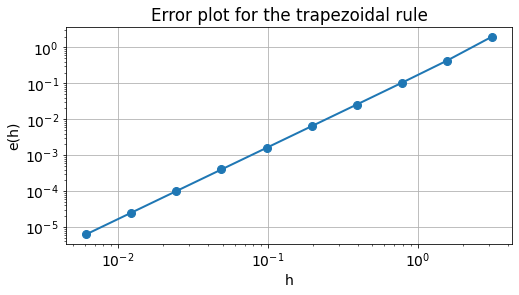

In [6]:
''' Find the order and the error plot for the trapezoidal rule '''

def trapezoidal(f, a, b, n):
    # The trapezoidal rule
    h = (b-a)/n                     # The stepsize
    x = np.linspace(a, b, n+1)      # Create a uniform grid x = [a=x_0,x_1,...,x_{n-1},x_n=b]
    res = h*np.sum(f(x[1:n]))       # h*(f(x_1)+f(x_2)+...+f(x_{n-1})
    res = res + 0.5*h*(f(a)+f(b))   # add the function values of the endpoints a and b
    return res

def f(x):                           # Define the function
    return np.sin(x)

a, b = 0, np.pi                     # integration interval
exact = 2

# Find an numerical approximation for different values of h. 
# Store the stepsize h and the error
n = 1                           # initial stepsize, h=(b-a) 
h = (b-a)/n
steps = []                      # arrays to store stepsizes and errors
errors = []
Nmax = 10
for k in range(Nmax):
    numres = trapezoidal(f, a, b, n)    # Numerical approximation
    eh = np.abs(exact - numres)         # Error e(h)
    print('h = {:8.2e},   T(h) = {:10.8f},   e(h) = {:8.2e}'.format(h, numres, eh))
    steps.append(h)                     # Append the step to the array
    errors.append(eh)                   # Append the error to the array
    n = 2*n                             # Reduce the stepsize with a factor 2
    h = (b-a)/n

# Find the order and the error constant
print('\nThe order p and the error constant C')
for k in range(1, Nmax-1):
    p = np.log(errors[k+1]/errors[k])/np.log(steps[k+1]/steps[k])
    C = errors[k+1]/steps[k+1]**p
    print(f"h = {steps[k]:8.2e},  p = {p:4.2f},  C = {C:6.4f}")

# Make an error plot
plt.clf()
plt.loglog(steps, errors, 'o-')
plt.xlabel('h')
plt.ylabel('e(h)')
plt.title('Error plot for the trapezoidal rule')
plt.grid('True')

# Taylor-expansions
Given a function $f\in C^{\infty}[a,b]$, choose a point $x$ and an increment $h$ such that 
$x, x+h \in [a,b]$. The Taylor expansion of $f$ around $x$ is then given by

$$
f(x+h) = \sum_{k=0}^{\infty} \frac{h^k}{k!}f^{(k)}(x).
$$

The function $f$ is called analytic in $x$ if the series converges for sufficiently small values of $|h|$.
In numerics, we will usually work with the truncated series, also known as the Taylor polynomial of
degree $m$:

$$
f(x+h) = \sum_{k=0}^{m} \frac{h^k}{k!}f^{(k)}(x) + R_{m+1}(x).
$$

The remainder term $R_{m+1}(x)$ is given by

$$
R_{m+1}(x) = \frac{h^{m+1}}{(m+1)!} f^{(m+1)}(\xi),
$$

where $\xi$ is some unknown point between $x$ and $x+h$. Unlike the full expansion, constructing the truncated series only requires that $f\in C^{(m+1)}$ near $x$. The remainder term is often  written as
$R_{m+1}(x)=\mathcal{O}(h^{m+1})$.
# Some other useful results

**Intermediate value theorem:**
Let $f\in C[a,b]$ and let $x$ be some number between $f(a)$ and $f(b)$, then there exist at least one $\xi \in (a,b)$ such that $f(\xi)=x$. 

The generalization of this reads: 
Given $k$ nodes $x_i\in [a,b]$ and $k$ positive weights
$w_i>0$, $i=1,\dotsc,k$. Then there exists at least one $\xi \in (a,b)$ such that

<!-- Equation labels as ordinary links -->
<div id="eq:gen_mid"></div>

$$
\begin{equation} \sum_{i=1}^{k} w_i f(x_i) = f(\xi) \sum_{i=1}^k w_i. 
\label{eq:gen_mid} \tag{1}
\end{equation}
$$

**Mean value theorem:**
 Let $f\in C^1[a,b]$. Then there exists at least one $\xi\in (a,b)$ such that

<!-- Equation labels as ordinary links -->
<div id="eq:mvt"></div>

$$
\begin{equation} \label{eq:mvt} \tag{2}
f'(\xi) = \frac{f(b)-f(a)}{b-a}
\end{equation}
$$

**Rolle's theorem:**
Let $f\in C^1[a,b]$ and $f(a)=f(b)=0$. Then there exists at least one $\xi \in (a,b)$ such that $f'(\xi)=0$. This is just a special case of the Mean value theorem.  

**Mean value theorem for integrals:**
Let $f\in C[a,b]$ and $g$ an integrable function that does not change sign on $[a,b]$. Then there exists a $\xi\in(a,b)$ such that

<!-- Equation labels as ordinary links -->
<div id="eq:mvti"></div>

$$
\begin{equation} \label{eq:mvti} \tag{3}
\int_a^b f(x)g(x)dx = f(\xi)\int_a^b g(x)dx.
\end{equation}
$$